# A simple 2-D example of PCA
(Adapted from http://stackoverflow.com/questions/18299523/basic-example-for-pca-with-matplotlib)

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Make up some random 2-dimensional data

In [36]:
N = 100
xTrue = np.linspace(0, 1000, N)
yTrue = 3 * xTrue
xData = xTrue + np.random.normal(0, 100, N)
yData = yTrue + np.random.normal(0, 100, N)
xData = np.reshape(xData, (N, 1))
yData = np.reshape(yData, (N, 1))
data = np.hstack((xData, yData))

# We first move the data so that it has mean of zero in each dimension
mu = data.mean(axis=0)
data = data - mu

print("data has shape ",data.shape)
print(data[0:5,:]) # the first few rows of the data matrix

data has shape  (100, 2)
[[ -470.05671402 -1511.07639923]
 [ -461.55085004 -1585.03438458]
 [ -405.05288653 -1333.38325604]
 [ -640.39722677 -1411.28049421]
 [ -406.02726044 -1369.60821277]]


## "SVD" is one technique from linear algebra for finding the principal components.

In [37]:
eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
projected_data = np.dot(data, eigenvectors)
sigma = projected_data.std(axis=0).mean()
print("Here are the eigenvectors found using np.linalg.svd:")
print(eigenvectors)
print("The eigenvalues are:")
print(eigenvalues)

Here are the eigenvectors found using np.linalg.svd:
[[-0.31249321 -0.94991999]
 [-0.94991999  0.31249321]]
The eigenvalues are:
[ 9295.644733    1083.67746883]


## Now plot the data, and the principal components.

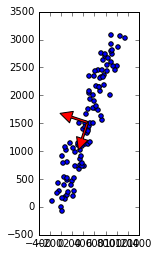

In [38]:
fig, ax = plt.subplots()
ax.scatter(xData, yData)
for axis in eigenvectors:
    start, end = mu, mu + sigma * axis
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=2.0))
ax.set_aspect('equal')
plt.show()